In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [43]:
df = pd.read_csv('./DATA/workingdata.csv')

In [3]:
df.describe()

,Year,Area_ha,Price_USD_tonne,Yield_hg_ha,TotalYield_tonnes
count,2704.000000,2.679000e+03,1854.000000,2679.000000,2.679000e+03
mean,2005.162352,7.972289e+04,578.003883,140716.343038,9.825225e+05
std,8.311093,3.246268e+05,441.094712,118818.791553,4.144654e+06
min,1991.000000,3.000000e+00,11.300000,2427.000000,1.200000e+01
25%,1998.000000,2.373000e+03,292.975000,55840.000000,1.900000e+04
50%,2005.000000,1.200000e+04,460.800000,98532.000000,1.242000e+05
75%,2012.000000,3.720350e+04,706.450000,181286.500000,5.271865e+05
max,2019.000000,2.987963e+06,3549.300000,875575.000000,4.242658e+07


In [4]:
df_total_years = df.groupby('Year').sum()
print(df_total_years)

        Area_ha  Price_USD_tonne  Yield_hg_ha  TotalYield_tonnes
Year                                                            
1991  6544515.0          21882.8    8459075.0         40271610.0
1992  7059200.0          21144.9   11750151.0         50563401.0
1993  7834159.0          19030.9   11505212.0         56429543.0
1994  8775914.0          22563.6   10793904.0         57271491.0
1995  9234704.0          26943.3   10934705.0         62485320.0
1996  9246062.0          26435.1   11446705.0         71030328.0
1997  8949981.0          25146.2   11470484.0         72754031.0
1998  8359336.0          23781.3   11535900.0         74001441.0
1999  8050077.0          25196.5   11674118.0         77390346.0
2000  7703731.0          23554.6   12297112.0         79077106.0
2001  7229678.0          25069.6   11098569.0         76712252.0
2002  6946839.0          28276.1   12249802.0         74073847.0
2003  6781287.0          33192.9   11931231.0         78783969.0
2004  6680847.0          

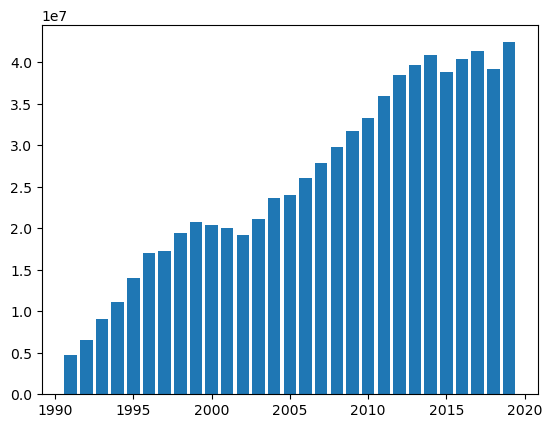

In [5]:

plt.bar(df.Year, df.TotalYield_tonnes)
    
#plt.title("Total World Yield by Years")
plt.show()

In [6]:
#Sorting the data by country per total yield to identify potential grouping producers categories.
df.sort_values(by = 'TotalYield_tonnes', ascending=False, inplace = True)

#make df copy and take only the rows with known values
yield_known_df = df.copy()
yield_known_df.dropna(subset = ['TotalYield_tonnes'], inplace=True)

price_known_df = df.copy()
price_known_df.dropna(subset = ['Price_USD_tonne'], inplace=True)

# separate the data by years 
years = df.Year.unique()
years = sorted(years)
years_df = {}
years_price_df = {}

for year in years:
    df_name = 'df_' + str(year)
    years_df[df_name] = yield_known_df.loc[yield_known_df['Year'] == year]
    years_df[df_name].sort_values(by=['TotalYield_tonnes'], ascending=False, inplace = True)
    
for year in years:
    df_name = 'df_' + str(year)
    years_price_df[df_name] = price_known_df.loc[price_known_df['Year'] == year]
    years_price_df[df_name].sort_values(by=['Price_USD_tonne'], ascending=False, inplace = True)



/Users/kath/anaconda3/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [7]:
yield_lengths = []
price_lengths = []

for key in years_df.keys():
    length = len(years_df[key])
    yield_lengths.append([key, length])

    
for key in years_price_df.keys():
    length = len(years_price_df[key])
    price_lengths.append([key, length])
    
yield_lengths = pd.DataFrame(yield_lengths, columns = ['year', 'countries_submitted_yield'])
price_lengths = pd.DataFrame(price_lengths, columns = ['year', 'countries_submitted_price'])
lengths = yield_lengths.merge(price_lengths, on = "year")

lengths.year = lengths.year.str.extract('(\d+)')
lengths.year=pd.to_numeric(lengths.year)

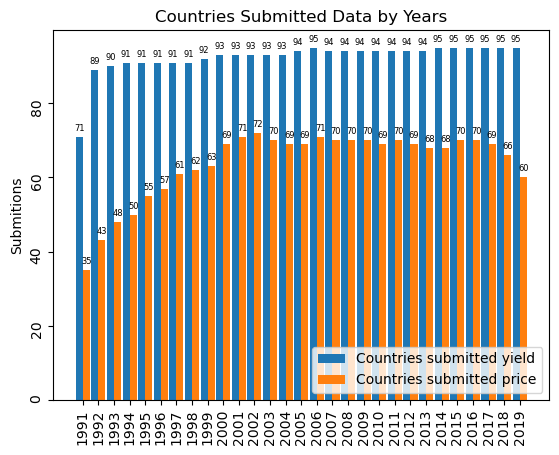

<Figure size 1500x600 with 0 Axes>

In [8]:
#check how much data is available 

x = np.arange(len(lengths/2))  # the label locations
width = 0.45  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, lengths.countries_submitted_yield, width, label='Countries submitted yield')
rects2 = ax.bar(x + width/2, lengths.countries_submitted_price, width, label='Countries submitted price')

#ax.bar(lengths.year, lengths.number_of_countries)
ax.set_title("Countries Submitted Data by Years")
ax.set_ylabel('Submitions')
ax.set_xticks(x)
ax.tick_params(labelrotation = 90)
ax.set_xticklabels(labels = lengths.year)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=6)


autolabel(rects1)
autolabel(rects2)
plt.legend(loc = "lower right")
plt.rc('xtick', labelsize=10)
plt.figure(figsize=(15,6))
#plt.figure(figsize=(600*px, 600*px))
plt.show()

Index(['Country', 'Year', 'Area_ha', 'Price_USD_tonne', 'Yield_hg_ha',
       'TotalYield_tonnes'],
      dtype='object')


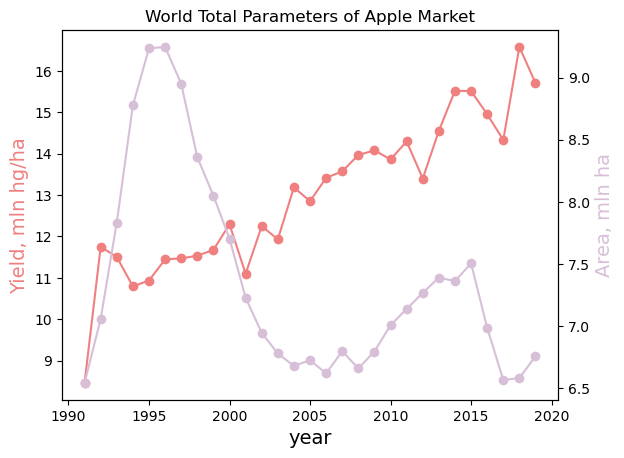

In [9]:
df_total = df.copy()
print(df_total.columns)
df_total = df_total.groupby(by='Year', as_index = False).sum()
df_total.Yield_hg_ha = df_total.Yield_hg_ha / 1000000
df_total.Area_ha = df_total.Area_ha / 1000000

fig,ax = plt.subplots()

ax.plot(df_total['Year'], df_total.Yield_hg_ha, color="#F08080", marker="o")
ax.set_xlabel("year",fontsize=14)
ax.set_ylabel('Yield, mln hg/ha', color="#F08080",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
ax2.plot(df_total['Year'], df_total.Area_ha,  color="#D8BFD8", marker="o")
ax2.set_ylabel("Area, mln ha",color="#D8BFD8",fontsize=14)

plt.title ('World Total Parameters of Apple Market')
plt.show()

In [10]:
print(df_total)

    Year   Area_ha  Price_USD_tonne  Yield_hg_ha  TotalYield_tonnes
0   1991  6.544515          21882.8     8.459075         40271610.0
1   1992  7.059200          21144.9    11.750151         50563401.0
2   1993  7.834159          19030.9    11.505212         56429543.0
3   1994  8.775914          22563.6    10.793904         57271491.0
4   1995  9.234704          26943.3    10.934705         62485320.0
5   1996  9.246062          26435.1    11.446705         71030328.0
6   1997  8.949981          25146.2    11.470484         72754031.0
7   1998  8.359336          23781.3    11.535900         74001441.0
8   1999  8.050077          25196.5    11.674118         77390346.0
9   2000  7.703731          23554.6    12.297112         79077106.0
10  2001  7.229678          25069.6    11.098569         76712252.0
11  2002  6.946839          28276.1    12.249802         74073847.0
12  2003  6.781287          33192.9    11.931231         78783969.0
13  2004  6.680847          35932.8    13.187506

In [42]:
df_interpolated = df.copy()
#few vals in 1991
df_interpolated.drop(df_interpolated[df_interpolated['Year'] == 1991].index, inplace = True)
#leave it for validation later on 
#df_interpolated.drop(df_interpolated[df_interpolated['Year'] == 2019].index, inplace = True)

print(df_interpolated.shape[1] - df_interpolated.count(axis=1))

#fill nans surrounding with values, only forward 
df_interpolated = df_interpolated.groupby(by='Country').apply(lambda group: group.interpolate(method='linear', axis=1, inplace = True))
#df_interpolated = df_interpolated.dropna(inplace=True)

print(type(df_interpolated))
#print(df_interpolated.shape[1] - df_interpolated.count(axis=1))

df.to_csv('lininterpolated.csv', index = False)



1       1
2       1
3       1
4       1
5       1
       ..
2699    0
2700    0
2701    0
2702    1
2703    1
Length: 2630, dtype: int64
<class 'pandas.core.frame.DataFrame'>


In [45]:
df_ffill = df.copy()

#few vals in 1991
df_ffill.drop(df_ffill[df_ffill['Year'] == 1991].index, inplace = True)
#leave it for validation later on 
df_ffill.drop(df_ffill[df_ffill['Year'] == 2019].index, inplace = True)

#fill nans surrounding with values, only forward 
df_ffill.groupby(by='Country').apply(lambda group: group.interpolate(method = 'pad', limit_area = 'inside', inplace=True))
df_ffill.dropna(inplace=True)


df_ffill.to_csv('lininterpolated.csv', index = False)

print(df_ffill)

       Country  Year  Area_ha  Price_USD_tonne  Yield_hg_ha  TotalYield_tonnes
31     Albania  1993   2076.0            461.0      48170.0            10000.0
33     Albania  1995   2140.0            323.6      46729.0            10000.0
34     Albania  1996   2100.0            325.4      47619.0            10000.0
35     Albania  1997   2242.0            253.1      50401.0            11300.0
36     Albania  1998   2300.0            248.9      50000.0            11500.0
...        ...   ...      ...              ...          ...                ...
2671     Yemen  2017   2179.0           2052.2      78068.0            17011.0
2672     Yemen  2018   2148.0           1991.4      77775.0            16706.0
2699  Zimbabwe  2015    744.0           1897.0      89516.0             6660.0
2700  Zimbabwe  2016    735.0           1789.0      89116.0             6550.0
2701  Zimbabwe  2017    734.0           1865.0      88747.0             6514.0

[1759 rows x 6 columns]


In [ ]:
df_total = df_interpolated.copy()
df_total = df_total.groupby(by='Year', as_index = False).sum()

df_total.Yield_hg_ha = df_total.Yield_hg_ha / 1000000
df_total.Price_USD_tonne = df_total.Price_USD_tonne / 1000

fig,ax = plt.subplots()

ax.plot(df_total['Year'], df_total.Yield_hg_ha, color="#F08080", marker="o")
ax.set_xlabel("year",fontsize=14)
ax.set_ylabel('Yield, mln hg/ha', color="#F08080",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
ax2.plot(df_total['Year'], df_total.Price_USD_tonne,  color="#A0522D", marker="o")
ax2.set_ylabel("Price, 1000 $ / tonne",color="#A0522D",fontsize=14)

plt.title ('World Total Parameters of Apple Market')
plt.show()

In [12]:
print(df_interpolated)

Empty DataFrame
Columns: []
Index: []
